In [1]:
# import các thư viện hỗ trợ đọc, xử lý dữ liệu, ma trận, biểu diễn đồ thị
import pandas as pd
import math
import matplotlib.pyplot as plt

# đọc file dữ liệu csv
dataSet = pd.read_csv("ProcessedCarData.csv")  

In [2]:
#hiển thị n dòng dữ liệu (n mẫu) đâù tiên
n = input("Nhập số mẫu dữ liệu mà bạn muốn hiển thị: ")
try:
    n = int(n)
    from IPython.display import display
    display(dataSet.head(n))
except:
    print("Ký tự bạn vừa nhập không phải là số!")

Nhập số mẫu dữ liệu mà bạn muốn hiển thị: 10


,buying_price,main_cost,doors,person_capacity,lug_boot,safety,class
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
5,vhigh,vhigh,two,two,med,high,unacc
6,vhigh,vhigh,two,two,big,low,unacc
7,vhigh,vhigh,two,two,big,med,unacc
8,vhigh,vhigh,two,two,big,high,unacc
9,vhigh,vhigh,two,four,small,low,unacc


In [3]:
#Hiển thị toàn bộ các mẫu trong tập dữ liệu, với thanh cuộn xuống
pd.set_option("display.max_rows", None)
dataSet

,buying_price,main_cost,doors,person_capacity,lug_boot,safety,class
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
5,vhigh,vhigh,two,two,med,high,unacc
6,vhigh,vhigh,two,two,big,low,unacc
7,vhigh,vhigh,two,two,big,med,unacc
8,vhigh,vhigh,two,two,big,high,unacc
9,vhigh,vhigh,two,four,small,low,unacc


In [4]:
#Kiểm tra số lượng thuộc tính và số mẫu trong tập dữ liệu
dataSet.shape

(1728, 7)

In [5]:
#Kiểm tra tên các thuộc tính (gồm cả thuộc tính phân lớp) trong tập dữ liệu
dataSet.columns

Index(['buying_price', 'main_cost', 'doors', 'person_capacity', 'lug_boot',
       'safety', 'class'],
      dtype='object')

In [6]:
#Kiểm tra tồn tại mẫu dữ liệu có giá trị thuộc tính là null hay không
dataSet.isnull().sum()

buying_price       0
main_cost          0
doors              0
person_capacity    0
lug_boot           0
safety             0
class              0
dtype: int64

In [7]:
#Số mẫu thuộc từng phân lớp trong tập dữ liệu gốc
dataSet['class'].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

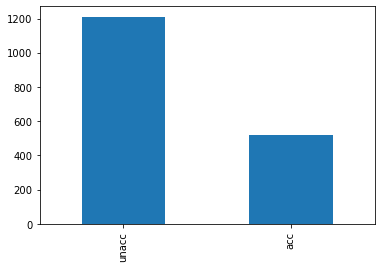

In [8]:
#Hiển thị biểu đồ số lượng các mẫu trong từng phân lớp
dataSet['class'].value_counts().plot(kind = 'bar')
plt.show()

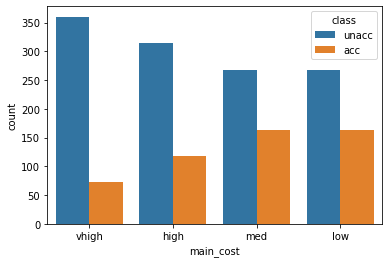

In [9]:
#Hiển thị biểu đồ phân lớp đánh giá xe theo chi phí bảo trì
import seaborn as sb
sb.countplot(x = dataSet['main_cost'], hue = dataSet['class'])
plt.show()

In [12]:
def find_entropy(df):
    Class = df.keys()[-1]  
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   
    target_variables = df[Class].unique()  
    variables = df[attribute].unique()    
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:#         
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)] 
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)
def buildTree(df,tree=None): 
    Class = df.keys()[-1]    
    node = find_winner(df)
    attValue = np.unique(df[node]) 
    if tree is None:                    
        tree={}
        tree[node] = {}
    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['class'],return_counts=True)                        
        if len(counts)==1:
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable)            
    return tree

import pandas as pd
import numpy as np
eps = np.finfo(float).eps
from numpy import log2 as log
df = pd.read_csv('ProcessedCarData.csv')
# print("\n Bộ dữ liệu huấn luyện:\n\n",df)
tree= buildTree(df)
import pprint

print("Các luật phân lớp: ")
pprint.pprint(tree)

#1642nd record
test={'buying_price':'low','main_cost':'low','doors':'two','person_capacity':'more','lug_boot':'small','safety':'high'}
def predic(test, tree, default=None):
    attribute = next(iter(tree)) 
    print(attribute) 
    if test[attribute] in tree[attribute].keys():
        print(tree[attribute].keys())
        print(test[attribute])
        result = tree[attribute][test[attribute]]
        if isinstance(result, dict):
            return predic(test, result)
        else:
            return result
    else:
        return default
    
prediction = predic(test, tree)

print(prediction)



Các luật phân lớp: 
{'safety': {'high': {'person_capacity': {'four': {'buying_price': {'high': {'main_cost': {'high': 'acc',
                                                                                          'low': 'acc',
                                                                                          'med': 'acc',
                                                                                          'vhigh': 'unacc'}},
                                                                   'low': 'acc',
                                                                   'med': 'acc',
                                                                   'vhigh': {'main_cost': {'high': 'unacc',
                                                                                           'low': 'acc',
                                                                                           'med': 'acc',
                                                                             